In [34]:
import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.wf_net import converter as wf_net_converter
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.objects.conversion.process_tree import converter
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

### IMPORT THE EVENT LOG
Using the file `ArtificialPatientTreatmentOriginal.xes`

In [28]:
data = xes_importer.apply('../data/ArtificialPatientTreatmentOriginal.xes')

### 1. Analysi tis domis tou arxeiou

In [14]:
type(data)

pm4py.objects.log.obj.EventLog

In [15]:
print(len(data)) # so we have 101 traces of the log
data

101


[{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': datetime.datetime(2017, 1, 9, 8, 29, 28)}]}, '....', {'attributes': {'concept:name': 'patient 100'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Bob', 'time:timestamp': datetime.datetime(2017, 5, 18, 11, 57, 11)}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 5, 31, 12, 46, 43)}]}]

In [16]:
print(data[0]) #prints the first trace of the log
print(data[0][0]) #prints the first event of the first trace

{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': datetime.datetime(2017, 1, 9, 8, 29, 28)}]}
{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}


In [17]:
df = pm4py.convert_to_dataframe(data)

In [18]:
df.head(15)

,concept:name,org:resource,time:timestamp,case:concept:name
0,First consult,Dr. Anna,2017-01-02 11:40:11,patient 0
1,Blood test,Lab,2017-01-02 12:47:33,patient 0
2,Physical test,Nurse Jesse,2017-01-02 12:53:50,patient 0
3,Second consult,Dr. Anna,2017-01-02 16:21:06,patient 0
4,Surgery,Dr. Charlie,2017-01-05 13:23:09,patient 0
5,Final consult,Dr. Ben,2017-01-09 08:29:28,patient 0
6,First consult,Dr. Anna,2017-01-02 12:50:35,patient 1
7,Physical test,Nurse Jesse,2017-01-02 13:59:14,patient 1
8,Blood test,Lab,2017-01-02 14:20:19,patient 1
9,X-ray scan,Team 1,2017-01-06 09:13:40,patient 1


In [19]:
df.groupby('case:concept:name').count() #ara diaxwrizontai ta traces me ena anagnwristiko to case:concept:name

,concept:name,org:resource,time:timestamp
case:concept:name,,,
patient 0,6,6,6
patient 1,7,7,7
patient 10,7,7,7
patient 100,7,7,7
patient 11,7,7,7
...,...,...,...
patient 95,6,6,6
patient 96,7,7,7
patient 97,7,7,7


Εδώ θα γράψουμε για τη δομή του αρχείου την απάντηση
* ...
* ...
* ...

### 2. Χρησιμοποιώντας το αρχείο ArtificialPatientTreatmentOriginal.xes, να παράξετε το Petri net μοντέλο της διαδικασίας.

### Construction of the log 
We can see that we have patients, each patient is one trace and we have events in each trace that all together correspond to the process that each patient went through when he visited the doctor

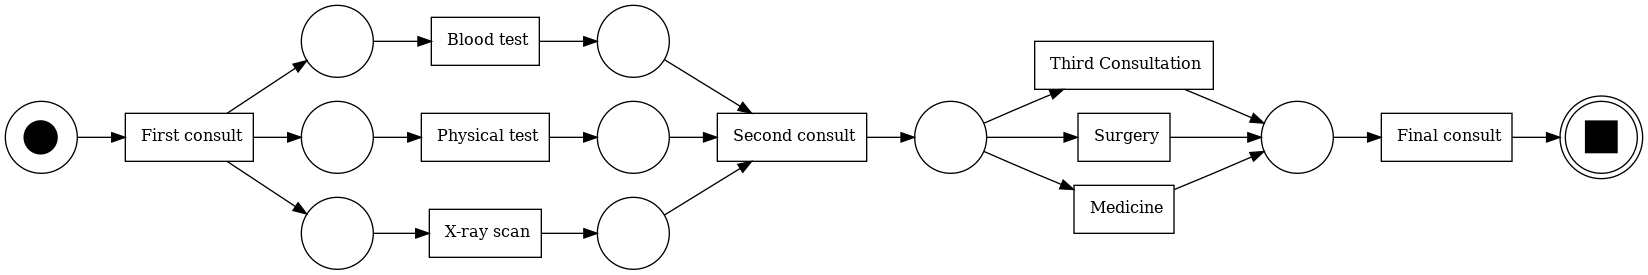

In [37]:
petri_net, initial_marking, final_marking = alpha_miner.apply(data)
graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(graph)

<ipython-input-23-07e4b974f8aa>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)


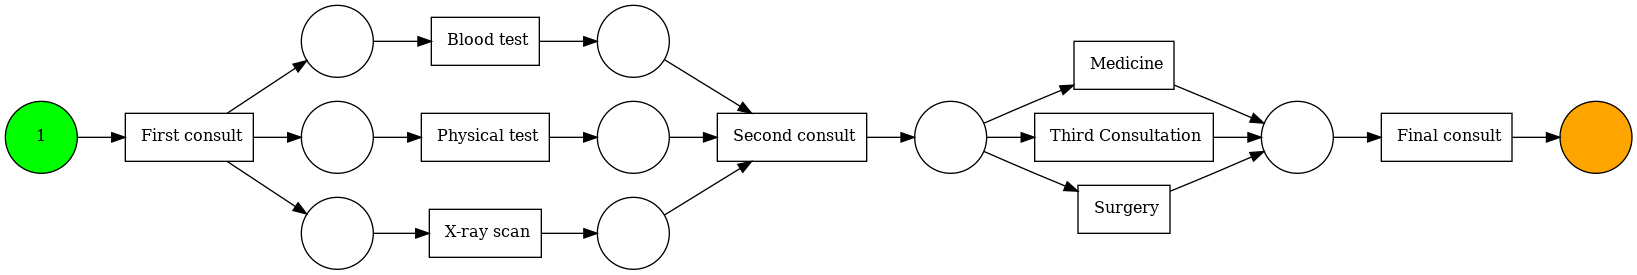

In [23]:
petri_net, initial_marking, final_marking = alpha_miner.apply(data)
graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(graph)

<ipython-input-20-618de4ce7662>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)


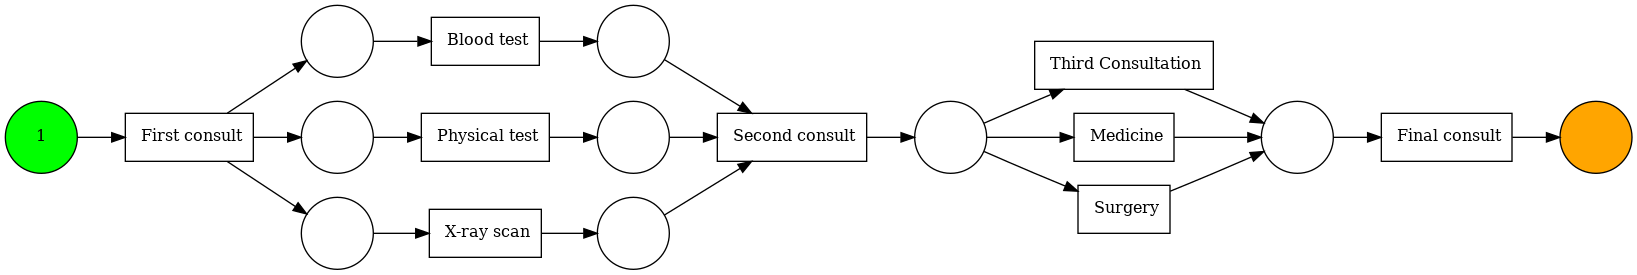

In [20]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer
petri_net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(data)
graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(graph)

In [35]:
net, initial_marking, final_marking = alpha_miner.apply(data)

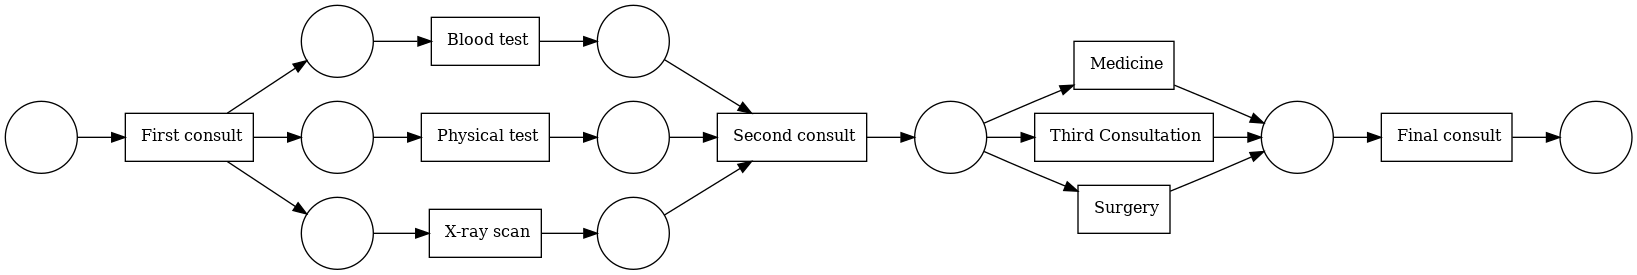

In [36]:
# Visualise 
graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(graph)

### 3. Να παράξετε το Process Tree μοντέλο του σημείου (2) και μέσω αυτού να δημιουργήσετε το ΒΜΡΝ μοντέλο. Να σχολιάσετε (περιγράψετε) το BPMN μοντέλο που παράχθηκε.

In [34]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(data)

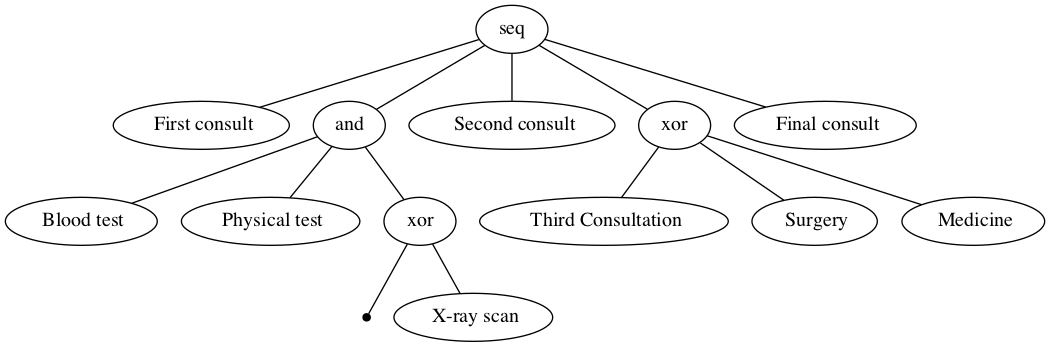

In [35]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(data)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

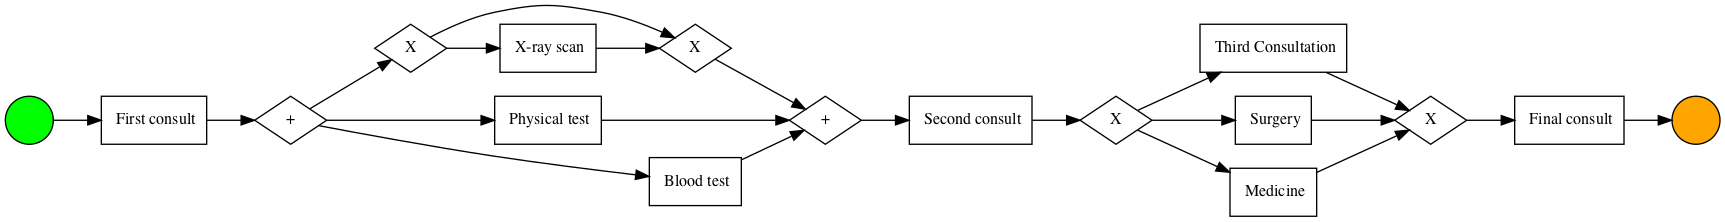

In [36]:
from pm4py.objects.conversion.process_tree import converter
tree = pm4py.discover_process_tree_inductive(data)

bpmn_graph = converter.apply(tree, variant=converter.Variants.TO_BPMN)
pm4py.view_bpmn(bpmn_graph)

### 4. Να χρησιμοποιήσετε κατάλληλες εντολές και συναρτήσεις της Python ώστε να παράξετε απευθείας το ΒΡΜΝ μοντέλο του σημείου (2) χωρίς τη χρήση Process Tree.

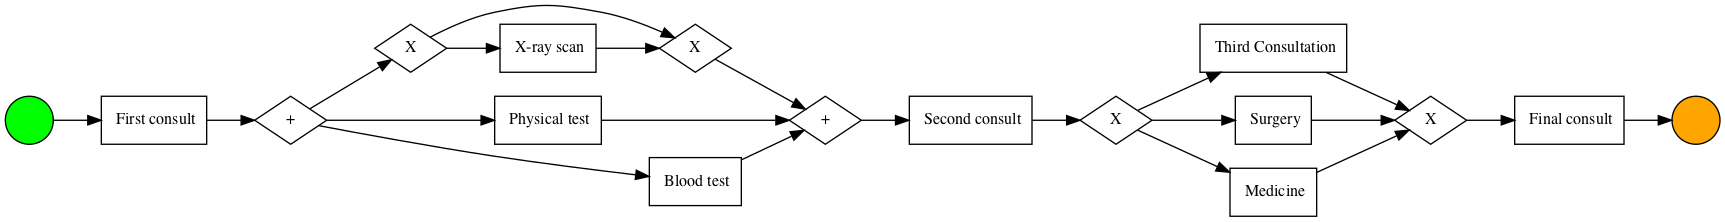

In [37]:
process_model = pm4py.discover_bpmn_inductive(data)
pm4py.view_bpmn(process_model)

### 5. Να συγκρίνετε τη δομή των δύο μοντέλων στα σημεία (3) και (4). Τι παρατηρείτε;

Here we will write the answer of 5

In [38]:
# and some code if needed

### 6. Να αιτιολογήσετε ποιο μοντέλο θα προτιμούσατε να χρησιμοποιήσετε ως βάση για την ανάλυση της διαδικασίας της εταιρείας, το Petri Net του σημείου (2) ή το ΒΡΜΝ του σημείου

Here we will write the answer of 6

In [39]:
# and some code if needed

### 7. Να τροποποιήσετε κατάλληλα το αρχείο ArtificialPatientTreatmentOriginal.xes ώστε να δημιουργηθούν εμβόλιμα οι νέες καταστάσεις (transitions) και θέσεις (places) στο Petri net του σημείου (2) ### αμέσως πριν την τελική μετάβαση, που να το επεκτείνουν όπως φαίνεται στο πιο κάτω σχήμα:

In [81]:
data = xes_importer.apply('../data/ArtificialPatientTreatmentOriginal.xes')

parsing log, completed traces ::   0%|          | 0/101 [00:00<?, ?it/s]

In [82]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(data)

/var/folders/wk/yjvhdpj533sgm01jhb0gwj7w0000gn/T/ipykernel_35618/1087869741.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking)


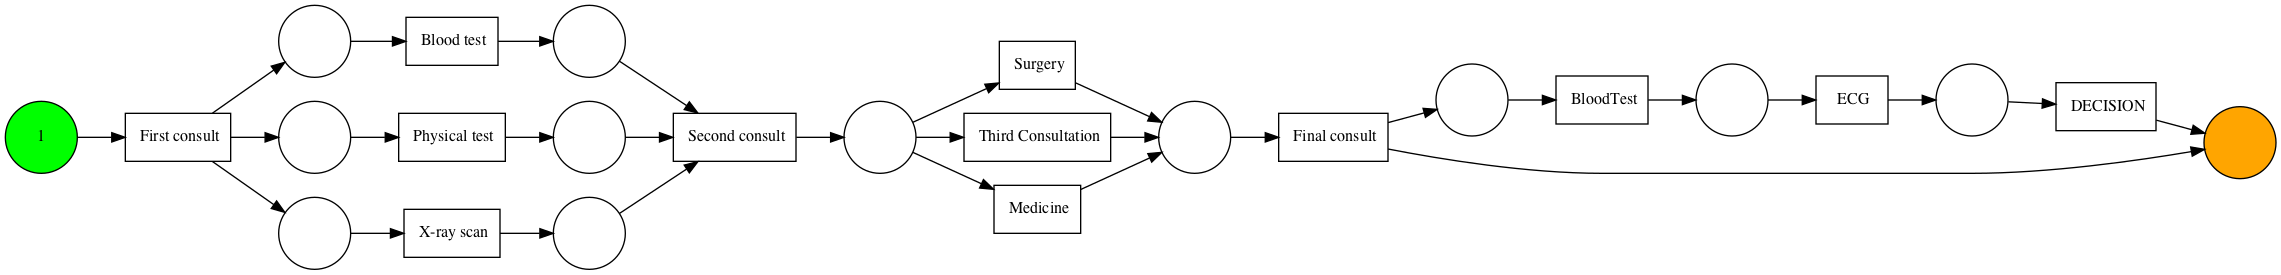

In [83]:
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer

# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

### 8. Χρησιμοποιήστε το αρχείο new.xes και να παράξετε ξανά το μοντέλο διαδικασιών Petri net και το ΒΡΜΝ μοντέλο όπως στα σημεία (2) και (3) αντίστοιχα.

In [88]:
new_log = xes_importer.apply('../data/new.xes')

parsing log, completed traces ::   0%|          | 0/22 [00:00<?, ?it/s]

##### PETRI NET

In [91]:
net, initial_marking, final_marking = alpha_miner.apply(new_log)

/var/folders/wk/yjvhdpj533sgm01jhb0gwj7w0000gn/T/ipykernel_35618/1087869741.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking)


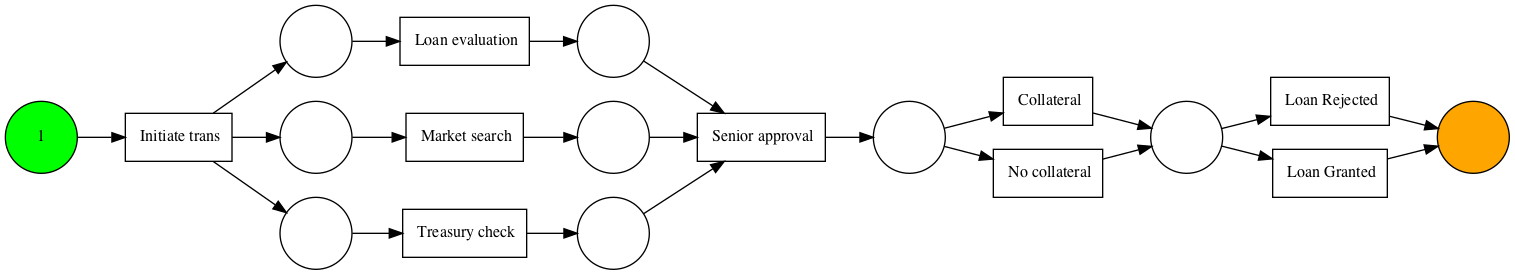

In [92]:
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer

# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

##### BPMN

In [93]:
net, initial_marking, final_marking = inductive_miner.apply(new_log)

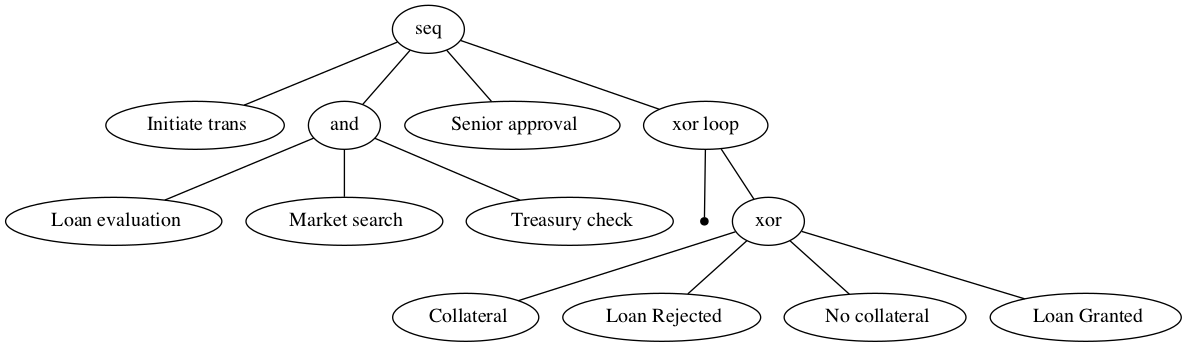

In [94]:
tree = inductive_miner.apply_tree(new_log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

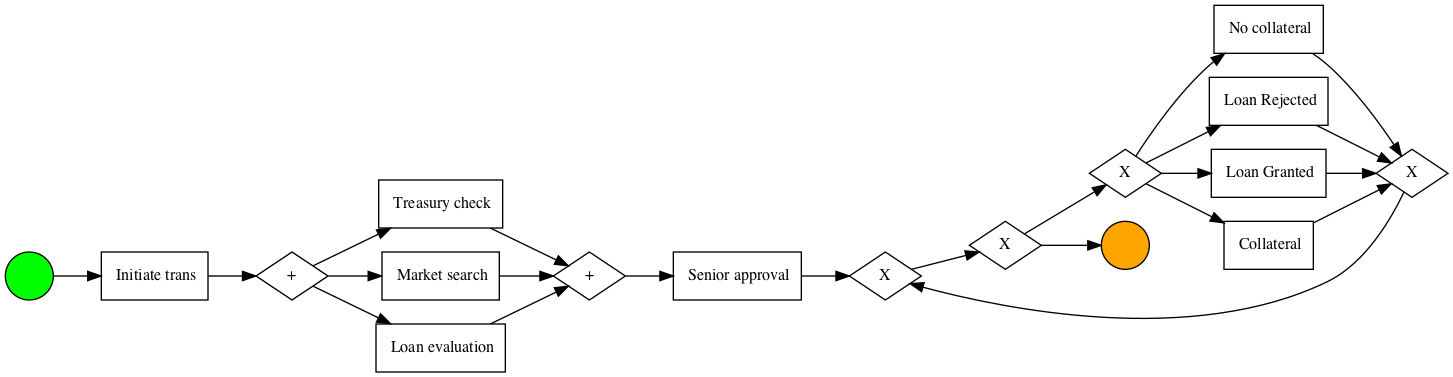

In [95]:
bpmn_graph = converter.apply(tree, variant=converter.Variants.TO_BPMN)
pm4py.view_bpmn(bpmn_graph)

### 9. Να χρησιμοποιήσετε κατάλληλες συναρτήσεις της Python ώστε να απεικονίσετε τη συχνότητα εμφάνισης των καταστάσεων στο Petri net του σημείου (8)

In [98]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=new_log)
pn_visualizer.save(gviz, "inductive_frequency.png")

/var/folders/wk/yjvhdpj533sgm01jhb0gwj7w0000gn/T/ipykernel_35618/2714130457.py:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=new_log)


replaying log with TBR, completed variants ::   0%|          | 0/11 [00:00<?, ?it/s]

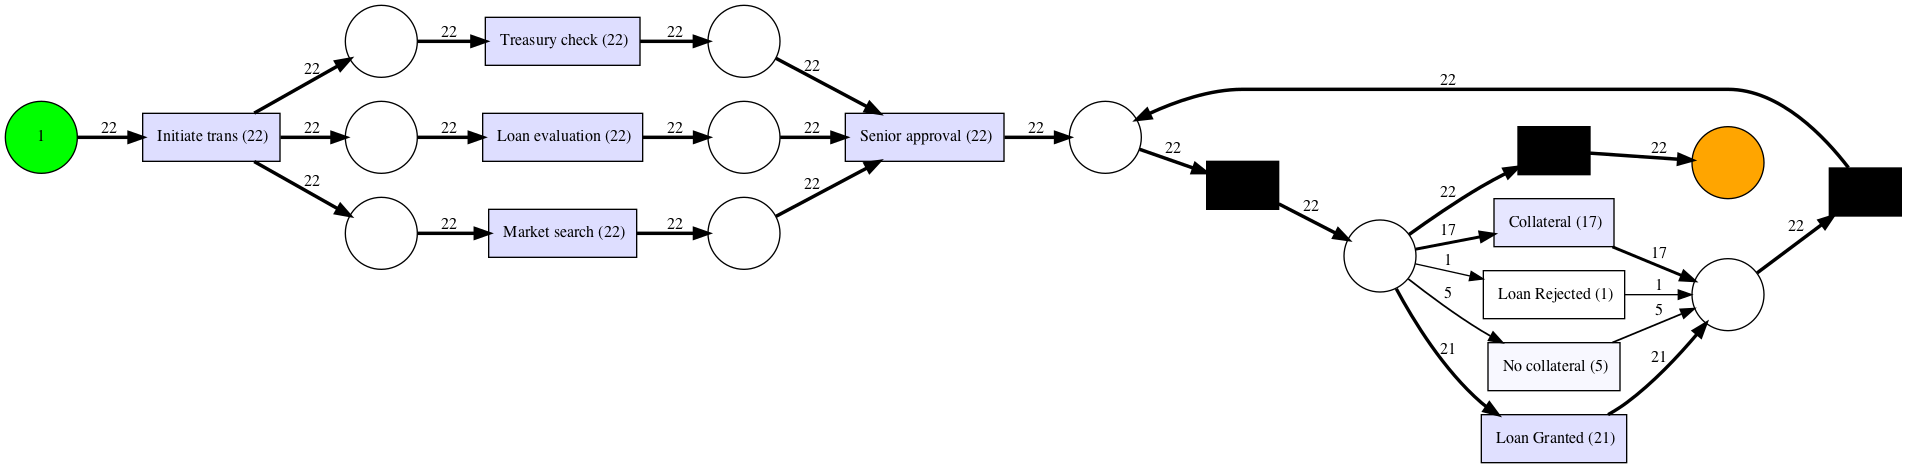

In [99]:
from IPython.display import display, Image
display(Image(filename='inductive_frequency.png'))

### 10.  Να χρησιμοποιήσετε κατάλληλες συναρτήσεις της Python ώστε να απεικονίσετε το heuristic net του αρχείου new.xes, που είναι μια άλλη μορφή transition system, και να το εξηγήσετε.

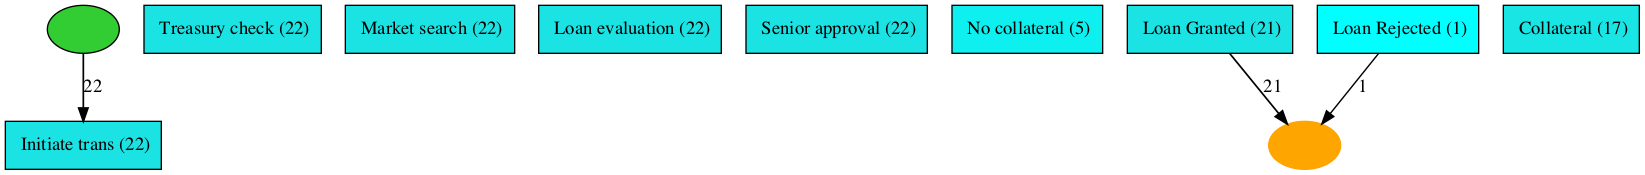

In [101]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(new_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)